<a href="https://colab.research.google.com/github/vini-fritzen/Inteligencia-Artificial/blob/main/exercicio_em_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 9

In [ ]:
# Instalar a lib fuzzy no python
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importando as libs
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import numpy as np

In [ ]:
# criando as variáveis de entrada e seus universos
peso = ctrl.Antecedent(np.arange(20,120,1),'peso')
altura = ctrl.Antecedent(np.arange(1.2, 2, 0.1),'altura')

In [ ]:
# # criando a variável de saída e seu universo
tamanho = ctrl.Consequent(np.arange(0, 1, .1),'tamanho')

In [ ]:
# criando as conjunto Fuzzy e suas funções de pertinência para entrada peso.
peso['baixo'] = fuzz.trimf(peso.universe, [20, 45, 70])
peso['medio'] = fuzz.trimf(peso.universe, [55,75, 95])
peso['alto'] = fuzz.trimf(peso.universe,[80, 100, 120])

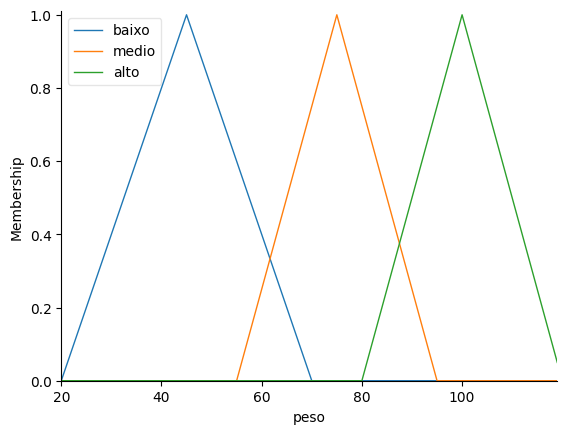

In [ ]:
# Visualizando o PESO
peso.view()

In [ ]:
# criando as conjunto Fuzzy e suas funções de pertinência para entrada altura.
altura['baixa'] = fuzz.trapmf(altura.universe, [1.2, 1.2, 1.4, 1.5])
altura['media'] = fuzz.trapmf(altura.universe, [1.4, 1.5,1.6,1.7])
altura['alta'] = fuzz.trapmf(altura.universe, [1.68, 1.7,2, 2])

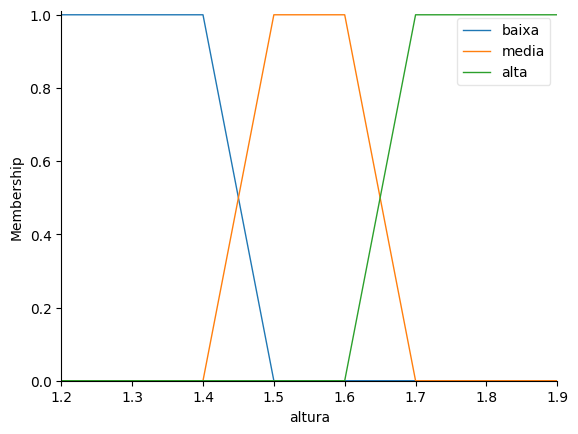

In [ ]:
# Visualizando a altura 
altura.view()

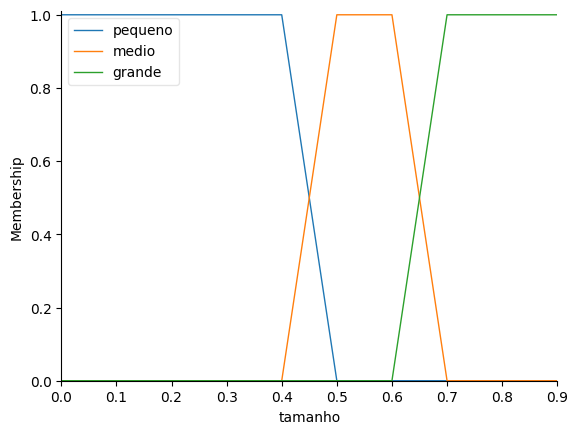

In [ ]:
# criando as conjunto Fuzzy e suas funções de pertinência para saída tamanho.
tamanho['pequeno'] = fuzz.trapmf(tamanho.universe,[0,0,0.4,0.5])
tamanho['medio'] = fuzz.trapmf(tamanho.universe,[0.4,0.5,0.6,0.7])
tamanho['grande'] = fuzz.trapmf(tamanho.universe,[0.65,0.7,1,1])
tamanho.view()

In [ ]:
# regra 1 - SE peso é baixo ENTÃO tamanho é pequeno;
regra1 = ctrl.Rule(peso['baixo'], tamanho['pequeno'])

# regra 2 - SE altura é mediana OU peso é médio ENTÃO tamanho é médio
regra2 = ctrl.Rule(altura['media'] | peso['medio'], tamanho['medio'])

# regra 3 - SE altura é alta E peso é alto ENTÃO tamanho é grande.
regra3 = ctrl.Rule(altura['alta'] & peso['alto'], tamanho['grande'])

In [ ]:
# criando o controlador fuzzy com as regras
fuzzy_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
# criando o motor de inferência.
engine = ctrl.ControlSystemSimulation(fuzzy_ctrl)

Digite o peso: 80
Digite a altura: 1.76
0.55


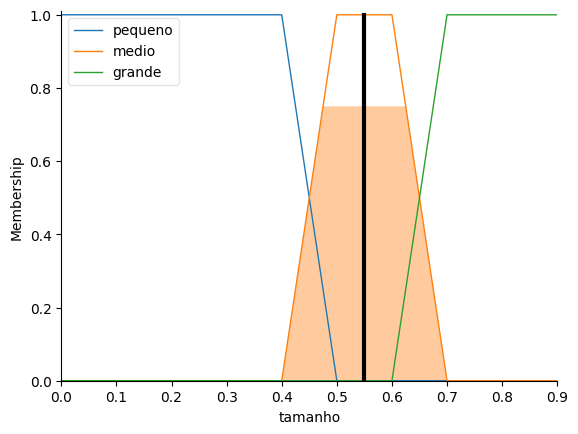

In [ ]:
peso_entrada = float(input("Digite o peso: "))
altura_entrada = float(input("Digite a altura: "))

# passa as prediçoes dos modelos para suas respectivas
engine.input[ 'peso'] = peso_entrada
engine.input[ 'altura'] = altura_entrada

# calcula a saida do sistema de controle fuzzy
engine.compute()

# retorna o valor crisp e o grafico mostrando-o
print(engine.output['tamanho'])
tamanho.view(sim=engine)

# Aula 10

In [152]:
# Importação de Libs
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [153]:
# Número de itens - 10
n = 10
numero_itens = np.arange(1,n+1)
# Gerando randomicamente os pesos
pesos = np.random.randint(1, 15, size = n)
# Gerando randomicamente os valores de cada item.
valores = np.random.randint(10, 750, size = n)
# Definindo o peso maximo para mochila.
max_peso_mochila = 35

In [154]:
# Printando as informações
print('Item. Peso (Kg) Valor ($)')
for i in range(numero_itens.shape[0]):
    print('{0} -----  {1} -----  {2}\n'.format(numero_itens[i], pesos[i], valores[i]))

Item. Peso (Kg) Valor ($)
1 -----  7 -----  597

2 -----  1 -----  454

3 -----  8 -----  247

4 -----  5 -----  145

5 -----  2 -----  184

6 -----  11 -----  565

7 -----  3 -----  87

8 -----  14 -----  491

9 -----  3 -----  265

10 -----  13 -----  704



In [155]:
# Número de soluççoes ou individios por população
solucao_por_populacao = 8
tamanho_populacao = (solucao_por_populacao, numero_itens.shape[0])
print( 'Tamano da População= {}' .format(tamanho_populacao))
print( 'Número de individuos(solução)= {}' .format(tamanho_populacao[0]))
print( 'Número itens (genes) = {}' .format(tamanho_populacao[1]))

Tamano da População= (8, 10)
Número de individuos(solução)= 8
Número itens (genes) = 10


In [156]:
# Inicialização da população
# Gerando randomicamente
populacao_inicial = np.random.randint(2,size = tamanho_populacao)
# Convertendo os tipos dos genes para inteiro
populacao_inicial = populacao_inicial.astype(int)
# Definindo o numero de geracoes
n_geracoes = 300
print( 'População Inicial: \n{} ' .format(populacao_inicial) )

População Inicial: 
[[1 0 0 0 0 0 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 0 0 1 0]
 [0 1 1 0 0 1 1 0 1 0]
 [0 0 1 1 1 1 1 0 1 1]
 [0 0 1 0 0 0 0 1 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 1 1 1]] 


In [157]:
# Função para calular o fitness de cada individuo
def cal_fitness(peso, valor, populacao, max_peso_mochila):
  fitness = np.empty(populacao.shape[0])
  #percorre cada individuo
  for i in range(populacao.shape[0]):
    # multiplica os itens que individuo ta levando pelo valor e soma
    S1 =np.sum(populacao[i] * valor)
    # multiplica os itens que individuo ta levando pelo peso e soma
    S2 =np.sum(populacao[i] * peso)
    # Verifica se 0 valor não passou da capacidade maxima da mochila
    if S2 <= max_peso_mochila:
      # Armazena o fitness do individuo
      fitness[i] = S1
    else :
      # Passou da capacidade max logo valor 0
      fitness[i] = 0
  return fitness.astype(int)

In [158]:
# Função para seleção dos individuos.
def selecao_roleta(fitness, numero_pais, populacao):
  # Soma todos os fitness
  max_fitness = sum(fitness)
  # Calcula a probalidade de cada um
  probabilidades = fitness/max_fitness
  # Realiza a seleção com base nas probalidades
  selecionados = populacao[np.random.choice(len(populacao),size=numero_pais,p=probabilidades)]
  return selecionados

In [159]:
def crossover(pais, numero_filhos):
  filhos =np.empty((numero_filhos, pais.shape[1]))
  # O ponto em que o cruzamento ocorre entre dois pais.
  ponto_crossover = int(pais.shape[1]/2)
  for k in range(numero_filhos):
    # Índice do primeiro a ser fatiado.
    pai_1_idx = k%pais.shape[0]
    # Índice do segundo a ser fatiado.
    pai_2_idx = (k+1)%pais.shape[0]
    # A nova prole terá sua primeira metade de seus genes retirados do primeiro pai.
    filhos[k, 0:ponto_crossover] = pais[pai_1_idx, 0:ponto_crossover]
    # A nova prole terá sua segunda metade de seus genes retirados do segundo pai.
    filhos[k, ponto_crossover:] = pais[pai_2_idx, ponto_crossover:]
  return filhos

In [160]:
def mutacao(filhos):
  # Cria um vetor para armazenar os individuos mutatos
  mutacoes = np.empty((filhos.shape))
  # Percorre todos os filhos
  for i in range(mutacoes.shape[0]):
    # Pega aleatoriamente (posição) um gene do filho
    posicao_gene = randint(0, filhos.shape[1]-1)
    # Se aquele gene é 0 muda pra 1
    if mutacoes[i,posicao_gene] == 0:
      mutacoes[i,posicao_gene] = 1
    # Se aquele gene é 1 muda pra 0
    else :
      mutacoes[i,posicao_gene] = 0
  return mutacoes

In [167]:
def rodar_AG(pesos, valores, populacao, tamanho_populacao, n_geracoes, max_peso_mochila):
  # Criando variáveis para parametros, historico de fitness
  parametros, historico_fitness = [], []
  # Calculando o número de pais.
  numero_pais = int(tamanho_populacao[0]/2)
  # Calculando o número de filhos.
  numero_filhos = tamanho_populacao[0] - numero_pais
  fitness = []
  print( 'Número de pais {} e Número de filhos {}' .format(numero_pais,numero_filhos))

  # Repetição até o número de gerações setado.
  for i in range(n_geracoes):
    # print("-------- Geração { } --------".format(i))
    # Calcula o fitness (aptidão) de cada individuo
    fitness = cal_fitness(pesos, valores, populacao, max_peso_mochila)
    # Armazena na variavel de histórico
    historico_fitness.append(fitness)
    # Pais selecionados
    pais = selecao_roleta(fitness, numero_pais, populacao)
    # print('Valores de fitness {}' .format(str(fitness)))
    # Gerando os filhos
    filhos = crossover(pais, numero_filhos)
    # Mutando os filhos
    filhos_mutados = mutacao(filhos)
    # Ajustando a população
    populacao[0:pais.shape[0], :] = pais
    populacao[pais.shape[0]:, :] = filhos_mutados
    
  print('Última Geração: \n{}\n'.format(populacao))
  fitness_ultima_geracao = cal_fitness(pesos, valores, populacao, max_peso_mochila)
  print('Fitness última Geração: \n{}\n'.format(fitness_ultima_geracao))
  # Encontra o melhor individuo
  max_fitness = np.where(fitness_ultima_geracao == np.max(fitness_ultima_geracao))
  # Salva o melhor individuo
  parametros.append(populacao[max_fitness[0][0],:])
  return parametros, historico_fitness
    

In [168]:
parametros, historico_fitness = rodar_AG(pesos, valores, populacao_inicial, tamanho_populacao, n_geracoes, max_peso_mochila)
print('Os parâmetros otimizados para as entradas fornecidas são: \n{}'.format(parametros))

Número de pais 4 e Número de filhos 4
Última Geração: 
[[1 1 1 0 0 0 0 1 0 0]
 [1 0 1 0 0 0 0 1 1 0]
 [1 0 1 0 0 0 0 1 1 0]
 [1 1 1 0 1 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 1 0]
 [0 1 1 1 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0]]

Fitness última Geração: 
[1789 1600 1600 1973 1316 1337 1542 1480]

Os parâmetros otimizados para as entradas fornecidas são: 
[array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0])]


In [169]:
itens_selecionados = numero_itens * parametros
print('\n Itens selecionados que maximizarão a mochila sem quebrá-la')
for i in range(itens_selecionados.shape[1]):
  if itens_selecionados[0][i] != 0:
    print('{}\n' .format(itens_selecionados[0][i]))


 Itens selecionados que maximizarão a mochila sem quebrá-la
1

2

3

5

8



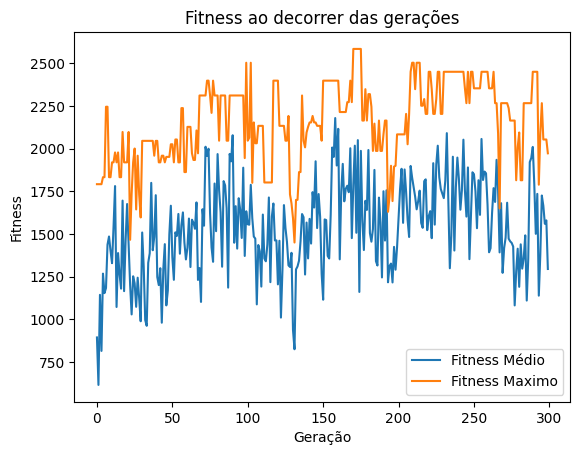

(300, 8)


In [171]:
fitness_medio = [np.mean(fitness) for fitness in historico_fitness]
fitness_max = [np.max(fitness) for fitness in historico_fitness]
plt.plot(list(range(n_geracoes)), fitness_medio, label = 'Fitness Médio')
plt.plot(list(range(n_geracoes)), fitness_max, label = 'Fitness Maximo')
plt.legend()
plt.title('Fitness ao decorrer das gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.show( )
print(np.asarray(historico_fitness).shape)